In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'human_tes',
        root = '..',
        default_wildcards={'specie': 'human'}
    )

In [2]:
import pandas as pd
import pyranges as pr
from pathlib import Path
from lapa.utils.io import read_tss_cluster
from lapa.result import LapaResult

In [3]:
df_links = pd.read_csv(snakemake.input['links'])

In [4]:
df_links.shape

(181500038, 7)

In [5]:
df_links.head()

,read_name,Chromosome,read_Start,read_End,Strand,start_site,polyA_site
0,m54284U_200719_085406/733/ccs,ERCC-00002,1,1035,+,1.0,1035.0
1,m54284U_200719_085406/1501/ccs,ERCC-00002,1,1035,+,1.0,1035.0
2,m54284U_200719_085406/65882/ccs,ERCC-00002,1,1037,+,1.0,1035.0
3,m54284U_200719_085406/65953/ccs,ERCC-00002,1,1034,+,1.0,1035.0
4,m54284U_200719_085406/66497/ccs,ERCC-00002,1,1035,+,1.0,1035.0


In [ ]:
df_gtf = pr.read_gtf(snakemake.input['gtf'], as_df=True)

In [ ]:
df_gtf_talon = pr.read_gtf(snakemake.input['gtf_talon'], as_df=True)

In [ ]:
df_gtf_talon_corrected = pr.read_gtf(snakemake.input['gtf_talon_corrected'], as_df=True)

In [ ]:
snakemake.input['tss_dir']

In [9]:
snakemake.input['tes_dir']

'/data/homezvol2/mcelik/Projects/rnawg/data/results/lapa_tss/wg_lapa_human'

In [8]:

df_tss_cluster = read_tss_cluster(Path(snakemake.input['tss_dir']) / 'tss_clusters.bed')

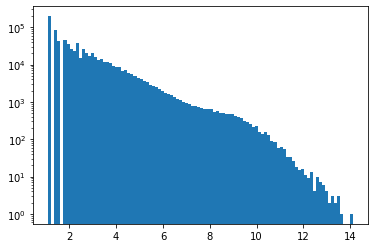

In [20]:
import numpy as np
import matplotlib.pyplot as plt


_ = plt.hist(np.log(df_tss_cluster['count']), bins=100)
plt.yscale('log')

In [ ]:
df_cluster = LapaResult(lapa_dir, tpm_cutoff=1).read_cluster()

In [40]:
df_abundance = pd.read_csv(snakemake.input['abundance'], sep='\t')

In [39]:
df_abundance[df_abundance['annot_gene_name'] == 'BRCA1'].sort_values('total', ascending=False)

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,...,hl60_m2_24hr_1_1,hl60_m2_24hr_1_2,a673_1_1,a673_1_2,h1_de_1_1,h1_de_1_2,h1_de_1_3,calu3_1_1,calu3_1_2,total
490886,46704,164651,ENSG00000012048.21,ENST00000354071.7#3,BRCA1,BRCA1-202#3,10,4497,Known,Known,...,0,0,0,0,0,0,0,0,0,110
490885,46704,164651,ENSG00000012048.21,ENST00000354071.7#2,BRCA1,BRCA1-202#2,10,4497,Known,Known,...,0,0,0,0,0,0,0,0,0,97
490882,46704,164651,ENSG00000012048.21,ENST00000354071.7#0,BRCA1,BRCA1-202#0,10,4497,Known,Known,...,1,0,0,0,0,0,0,0,0,86
602612,46704,164658,ENSG00000012048.21,ENST00000494123.5#3,BRCA1,BRCA1-223#3,10,1612,Known,Known,...,1,1,0,0,0,0,0,0,0,77
602611,46704,164658,ENSG00000012048.21,ENST00000494123.5#2,BRCA1,BRCA1-223#2,10,1612,Known,Known,...,0,0,0,0,0,0,0,0,1,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704150,46704,164637,ENSG00000012048.21,ENST00000644379.1#0,BRCA1,BRCA1-232#0,15,2571,Known,Known,...,0,0,0,0,0,0,0,0,0,2
698987,46704,164652,ENSG00000012048.21,ENST00000634433.1,BRCA1,BRCA1-230,8,2534,Known,Known,...,0,0,0,0,0,0,0,0,0,1
600620,46704,164643,ENSG00000012048.21,ENST00000491747.6,BRCA1,BRCA1-219,23,2379,Known,Known,...,0,0,0,0,0,0,0,0,0,0
490564,46704,164633,ENSG00000012048.21,ENST00000352993.7,BRCA1,BRCA1-201,22,3668,Known,Known,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_abundance['total'] = df_abundance[df_abundance.columns.tolist()[11:]].sum(axis=1)

In [41]:
snakemake.input['abundance']

'/data/homezvol2/mcelik/Projects/rnawg/data/results/talon/human_talon_abundance_filtered.corrected.tsv'

In [47]:
! cat /data/homezvol2/mcelik/Projects/rnawg/data/results/talon/human_talon_abundance_filtered.corrected.tsv | grep "GAPDH"

33933	251111	ENSG00000111640.14	ENCODEHT000251111	GAPDH	ENCODEHT000251111	2	4340	Known	ISM	Suffix	0	0	0	0	0	0	0	0	0	0	2	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	1	0	0
33933	251111	ENSG00000111640.14	ENCODEHT000251111#0	GAPDH	ENCODEHT000251111#0	2	4340	Known	ISM	Suffix	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	4	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	2	0	0	0
33933	251111	ENSG00000111640.14	ENCODEHT000251111#1	GAPDH	ENCODEHT000251111#1	2	4340	Known	ISM	Suffix	0	0	0	0	0	0	0	0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	